# MakeItTalk Quick Demo (natural human face animation)

## TDLR version

Remember to change to GPU runtime first!

## Preparation (run only once)

In [1]:
print('Git clone project and install requirements...')
!git clone https://github.com/Garvit-32/MakeItTalk.git &> /dev/null
%cd MakeItTalk/
!export PYTHONPATH=/content/MakeItTalk:$PYTHONPATH
!pip install -r requirements.txt &> /dev/null
!pip install tensorboardX &> /dev/null
!mkdir examples/dump
!mkdir examples/ckpt
!pip install gdown &> /dev/null
print('Done!')
print('Download pre-trained models...')
!gdown -O examples/ckpt/ckpt_116_i2i_comb.pth https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a
!gdown -O examples/ckpt/ckpt_autovc.pth https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x
!gdown -O examples/ckpt/ckpt_content_branch.pth https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
!gdown -O examples/ckpt/ckpt_speaker_branch.pth https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
!gdown -O examples/dump/emb.pickle https://drive.google.com/uc?id=18-0CYl5E6ungS3H4rRSHjfYvvm-WwjTI
!gdown -O thirdparty/AdaptiveWingLoss/ckpt/WFLW_4HG.pth https://drive.google.com/uc?id=1HZaSjLoorQ4QCEx7PRTxOmg0bBPYSqhH
print('Done!')

Git clone project and install requirements...
/content/MakeItTalk
Done!
Download pre-trained models...
Downloading...
From: https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a
To: /content/MakeItTalk/examples/ckpt/ckpt_116_i2i_comb.pth
839MB [00:07, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x
To: /content/MakeItTalk/examples/ckpt/ckpt_autovc.pth
172MB [00:03, 55.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
To: /content/MakeItTalk/examples/ckpt/ckpt_content_branch.pth
7.88MB [00:00, 69.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
To: /content/MakeItTalk/examples/ckpt/ckpt_speaker_branch.pth
15.4MB [00:00, 72.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=18-0CYl5E6ungS3H4rRSHjfYvvm-WwjTI
To: /content/MakeItTalk/examples/dump/emb.pickle
30.9MB [00:00, 85.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HZaSj

In [ ]:
# from google.colab import drive
# drive.mount('drive')
# !unzip /content/MakeItTalk/drive/MyDrive/MakeItTalk/pruned_i2i.zip

## Animate your photos here!

- Upload your images to `examples` with size `256x256`. Or use existing ones.

- Upload your speech audio files (could be many) to `examples`. Since it will process all `.wav` files under `examples`, remember to delete non-necessary `.wav` files. Or use an existing one `M6_04_16k.wav`.

## Step 1/3: Choose your image (in below Dropdown). 

Choose the image name to animate: (saved in folder 'examples/')
['angelina', 'anne', 'anne2', 'audrey', 'aya', 'captain', 'captain2', 'cesi', 'chris', 'chris2', 'dali', 'donald', 'dragonmom', 'dwayne', 'dwayne2', 'dwayne3', 'harry', 'hermione', 'hermione2', 'hound', 'jali', 'john', 'johncartoon', 'johnny', 'kalo', 'lab1', 'lab2', 'lab3', 'lab4', 'leo', 'leo2', 'monalisa2', 'monalisa3', 'morgan', 'mulan', 'natalie', 'natalie2', 'neo', 'obama', 'paint1', 'paint3', 'paint_boy', 'paint_boy2', 'rihanna', 'ron', 'scarlett', 'statue1', 'statue2', 'stephen', 'taylor', 'trump', 'trump2']


Dropdown(index=41, options=('angelina', 'anne', 'anne2', 'audrey', 'aya', 'captain', 'captain2', 'cesi', 'chri…

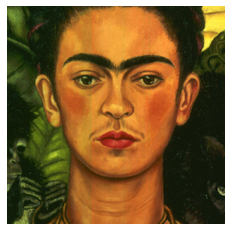

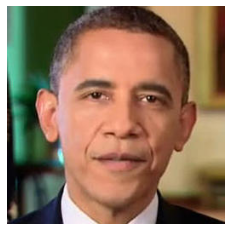

In [17]:
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples', '*.jpg')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
print(img_list)
default_head_name = widgets.Dropdown(options=img_list, value='paint_boy')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/{}.jpg'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/{}.jpg'.format(default_head_name.value)))
plt.axis('off')
plt.show()

## Step 2/3: Setup your animation controllers (on right Sliders).

In [18]:
#@markdown # Animation Controllers
#@markdown Amplify the lip motion in horizontal direction
AMP_LIP_SHAPE_X = 2 #@param {type:"slider", min:0.5, max:5.0, step:0.1}

#@markdown Amplify the lip motion in vertical direction
AMP_LIP_SHAPE_Y = 2 #@param {type:"slider", min:0.5, max:5.0, step:0.1}

#@markdown Amplify the head pose motion (usually smaller than 1.0, put it to 0. for a static head pose)
AMP_HEAD_POSE_MOTION = 0.35 #@param {type:"slider", min:0.0, max:1.0, step:0.05}

#@markdown Add naive eye blink
ADD_NAIVE_EYE = True  #@param ["False", "True"] {type:"raw"}

#@markdown If your image has an opened mouth, put this as True, else False
CLOSE_INPUT_FACE_MOUTH = False  #@param ["False", "True"] {type:"raw"}          


#@markdown # Landmark Adjustment

#@markdown Adjust upper lip thickness (postive value means thicker)
UPPER_LIP_ADJUST = -1 #@param {type:"slider", min:-3.0, max:3.0, step:1.0}

#@markdown Adjust lower lip thickness (postive value means thicker)
LOWER_LIP_ADJUST = -1 #@param {type:"slider", min:-3.0, max:3.0, step:1.0}

#@markdown Adjust static lip width (in multipication)
LIP_WIDTH_ADJUST = 1.0 #@param {type:"slider", min:0.8, max:1.2, step:0.01}

## Step 3/3: One-click to Run (just wait in seconds).

In [19]:
import sys
sys.path.append("thirdparty/AdaptiveWingLoss")
import os, glob
import numpy as np
import cv2
import argparse
from src.approaches.train_image_translation import Image_translation_block
import torch
import pickle
import face_alignment
from src.autovc.AutoVC_mel_Convertor_retrain_version import AutoVC_mel_Convertor
import shutil
import time
import util.utils as util
from scipy.signal import savgol_filter
from src.approaches.train_audio2landmark import Audio2landmark_model

sys.stdout = open(os.devnull, 'a')

parser = argparse.ArgumentParser()
parser.add_argument('--jpg', type=str, default='{}.jpg'.format(default_head_name.value))
parser.add_argument('--close_input_face_mouth', default=CLOSE_INPUT_FACE_MOUTH, action='store_true')
parser.add_argument('--load_AUTOVC_name', type=str, default='examples/ckpt/ckpt_autovc.pth')
parser.add_argument('--load_a2l_G_name', type=str, default='examples/ckpt/ckpt_speaker_branch.pth')
parser.add_argument('--load_a2l_C_name', type=str, default='examples/ckpt/ckpt_content_branch.pth') #ckpt_audio2landmark_c.pth')
parser.add_argument('--load_G_name', type=str, default='/content/MakeItTalk/pruned_model1.h5') #ckpt_image2image.pth') #ckpt_i2i_finetune_150.pth') #c
parser.add_argument('--amp_lip_x', type=float, default=AMP_LIP_SHAPE_X)
parser.add_argument('--amp_lip_y', type=float, default=AMP_LIP_SHAPE_Y)
parser.add_argument('--amp_pos', type=float, default=AMP_HEAD_POSE_MOTION)
parser.add_argument('--reuse_train_emb_list', type=str, nargs='+', default=[]) #  ['iWeklsXc0H8']) #['45hn7-LXDX8']) #['E_kmpT-EfOg']) #'iWeklsXc0H8', '29k8RtSUjE0', '45hn7-LXDX8',
parser.add_argument('--add_audio_in', default=False, action='store_true')
parser.add_argument('--comb_fan_awing', default=False, action='store_true')
parser.add_argument('--output_folder', type=str, default='examples')
parser.add_argument('--test_end2end', default=True, action='store_true')
parser.add_argument('--dump_dir', type=str, default='', help='')
parser.add_argument('--pos_dim', default=7, type=int)
parser.add_argument('--use_prior_net', default=True, action='store_true')
parser.add_argument('--transformer_d_model', default=32, type=int)
parser.add_argument('--transformer_N', default=2, type=int)
parser.add_argument('--transformer_heads', default=2, type=int)
parser.add_argument('--spk_emb_enc_size', default=16, type=int)
parser.add_argument('--init_content_encoder', type=str, default='')
parser.add_argument('--lr', type=float, default=1e-3, help='learning rate')
parser.add_argument('--reg_lr', type=float, default=1e-6, help='weight decay')
parser.add_argument('--write', default=False, action='store_true')
parser.add_argument('--segment_batch_size', type=int, default=1, help='batch size')
parser.add_argument('--emb_coef', default=3.0, type=float)
parser.add_argument('--lambda_laplacian_smooth_loss', default=1.0, type=float)
parser.add_argument('--use_11spk_only', default=False, action='store_true')
parser.add_argument('-f')
opt_parser = parser.parse_args()

img = cv2.imread('examples/' + opt_parser.jpg)
predictor = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cpu', flip_input=True)
shapes = predictor.get_landmarks(img)
if (not shapes or len(shapes) != 1):
    print('Cannot detect face landmarks. Exit.')
    exit(-1)
shape_3d = shapes[0]
if(opt_parser.close_input_face_mouth):
    util.close_input_face_mouth(shape_3d)
shape_3d[48:, 0] = (shape_3d[48:, 0] - np.mean(shape_3d[48:, 0])) * LIP_WIDTH_ADJUST + np.mean(shape_3d[48:, 0]) # wider lips
shape_3d[49:54, 1] -= UPPER_LIP_ADJUST           # thinner upper lip
shape_3d[55:60, 1] += LOWER_LIP_ADJUST           # thinner lower lip
shape_3d[[37,38,43,44], 1] -=2.    # larger eyes
shape_3d[[40,41,46,47], 1] +=2.    # larger eyes
shape_3d, scale, shift = util.norm_input_face(shape_3d)

print("Loaded Image...", file=sys.stderr)

au_data = []
au_emb = []
ains = glob.glob1('examples', '*.wav')
ains = [item for item in ains if item is not 'tmp.wav']
ains.sort()
for ain in ains:
    os.system('ffmpeg -y -loglevel error -i examples/{} -ar 16000 examples/tmp.wav'.format(ain))
    shutil.copyfile('examples/tmp.wav', 'examples/{}'.format(ain))

    # au embedding
    from thirdparty.resemblyer_util.speaker_emb import get_spk_emb
    me, ae = get_spk_emb('examples/{}'.format(ain))
    au_emb.append(me.reshape(-1))

    print('Processing audio file', ain)
    c = AutoVC_mel_Convertor('examples')

    au_data_i = c.convert_single_wav_to_autovc_input(audio_filename=os.path.join('examples', ain),
           autovc_model_path=opt_parser.load_AUTOVC_name)
    au_data += au_data_i
if(os.path.isfile('examples/tmp.wav')):
    os.remove('examples/tmp.wav')

print("Loaded audio...", file=sys.stderr)

# landmark fake placeholder
fl_data = []
rot_tran, rot_quat, anchor_t_shape = [], [], []
for au, info in au_data:
    au_length = au.shape[0]
    fl = np.zeros(shape=(au_length, 68 * 3))
    fl_data.append((fl, info))
    rot_tran.append(np.zeros(shape=(au_length, 3, 4)))
    rot_quat.append(np.zeros(shape=(au_length, 4)))
    anchor_t_shape.append(np.zeros(shape=(au_length, 68 * 3)))

if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_au.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_au.pickle'))
if (os.path.exists(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))

with open(os.path.join('examples', 'dump', 'random_val_fl.pickle'), 'wb') as fp:
    pickle.dump(fl_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_au.pickle'), 'wb') as fp:
    pickle.dump(au_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_gaze.pickle'), 'wb') as fp:
    gaze = {'rot_trans':rot_tran, 'rot_quat':rot_quat, 'anchor_t_shape':anchor_t_shape}
    pickle.dump(gaze, fp)

model = Audio2landmark_model(opt_parser, jpg_shape=shape_3d)
if(len(opt_parser.reuse_train_emb_list) == 0):
    model.test(au_emb=au_emb)
else:
    model.test(au_emb=None)

print("Audio->Landmark...", file=sys.stderr)

fls = glob.glob1('examples', 'pred_fls_*.txt')
fls.sort()

# print(len(fls))
for i in range(0,len(fls)):
    fl = np.loadtxt(os.path.join('examples', fls[i])).reshape((-1, 68,3))
    fl[:, :, 0:2] = -fl[:, :, 0:2]
    fl[:, :, 0:2] = fl[:, :, 0:2] / scale - shift

    if (ADD_NAIVE_EYE):
        fl = util.add_naive_eye(fl)

    # additional smooth
    fl = fl.reshape((-1, 204))
    fl[:, :48 * 3] = savgol_filter(fl[:, :48 * 3], 15, 3, axis=0)
    fl[:, 48*3:] = savgol_filter(fl[:, 48*3:], 5, 3, axis=0)
    fl = fl.reshape((-1, 68, 3))

    print(True)
    ''' STEP 6: Imag2image translation '''
    model = Image_translation_block(opt_parser, single_test=True)
    print(model)
    with torch.no_grad():
        model.single_test(jpg=img, fls=fl, filename=fls[i], prefix=opt_parser.jpg.split('.')[0])
        print('finish image2image gen')
    os.remove(os.path.join('examples', fls[i]))

    print("{} / {}: Landmark->Face...".format(i+1, len(fls)), file=sys.stderr)
print("Done!", file=sys.stderr)

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-7835d9f11d.pth.tar" to /root/.cache/torch/hub/checkpoints/3DFAN4-7835d9f11d.pth.tar


Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-2a464da4ea.pth.tar" to /root/.cache/torch/hub/checkpoints/depth-2a464da4ea.pth.tar


Loaded Image...
Loaded audio...
/content/MakeItTalk/src/approaches/train_audio2landmark.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  aus.shape[0], 128), requires_grad=False, dtype=torch.float).to(device)
Audio->Landmark...
1 / 1: Landmark->Face...
Done!


## Visualize your animation!

In [20]:
from IPython.display import HTML
from base64 import b64encode

for ain in ains:
  OUTPUT_MP4_NAME = '{}_pred_fls_{}_audio_embed.mp4'.format(
    opt_parser.jpg.split('.')[0],
    ain.split('.')[0]
    )
  mp4 = open('examples/{}'.format(OUTPUT_MP4_NAME),'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

  print('Display animation: examples/{}'.format(OUTPUT_MP4_NAME), file=sys.stderr)
  display(HTML("""
  <video width=600 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))

Display animation: examples/obama_pred_fls_M6_04_16k_audio_embed.mp4


# Prune


In [3]:
!pip install torchsummary
!pip install torch_pruning

# !gdown -O examples/ckpt/ckpt_116_i2i_comb.pth https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a

In [5]:
# %cd MakeItTalk

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from src.models.model_image_translation import ResUnetGenerator, VGGLoss

In [7]:
# x = torch.load('examples/ckpt/ckpt_116_i2i_comb.pth')
# print(x['opt'])

In [8]:
ckpt = torch.load('/content/MakeItTalk/examples/ckpt/ckpt_116_i2i_comb.pth')
model = ResUnetGenerator(input_nc=6, output_nc=3, num_downs=6, use_dropout=False).to('cuda')
tmp = nn.DataParallel(model)
tmp.load_state_dict(ckpt['G'])
model.load_state_dict(tmp.module.state_dict())
del tmp

In [10]:
torch.save(model,'model.h5')

In [11]:
params = sum([np.prod(p.size()) for p in model.parameters()])
print("Number of Parameters: %fM" % (params/1e6))

Number of Parameters: 69.860736M


In [9]:
import torch_pruning as tp
def prune_model(model):
    # model.cpu()
    DG = tp.DependencyGraph().build_dependency(model, torch.randn(8, 6, 256, 256))

    def prune_conv(conv, pruned_prob):
        weight = conv.weight.detach().cpu().numpy()
        out_channels = weight.shape[0]
        print(out_channels)
        L1_norm = np.sum(np.abs(weight), axis=(1, 2, 3))
        num_pruned = int(out_channels * pruned_prob)
        # remove filters with small L1-Norm
        prune_index = np.argsort(L1_norm)[:num_pruned].tolist()
        plan = DG.get_pruning_plan(conv, tp.prune_conv, prune_index)
        plan.exec()

    block_prune_probs = []
    for i in range(100):
        if i < 30:
            block_prune_probs.append(0.000000001)
        if i > 30 and i < 50:
            block_prune_probs.append(0.000000001)
        if i > 50:
            block_prune_probs.append(0.000000001)
    blk_id = 0
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            prune_conv(m, block_prune_probs[blk_id])
            blk_id += 1
        # if isinstance(m, ResidualBlock):
        #     for j in m.block.modules():
        #         if isinstance(j, nn.Conv2d):
        #             prune_conv(j, block_prune_probs[blk_id])
        #     blk_id += 1

    return model

In [ ]:
model = prune_model(model).to('cuda')

In [14]:
params = sum([np.prod(p.size()) for p in model.parameters()])
print("Number of Parameters: %fM" % (params/1e6))

Number of Parameters: 69.860736M


In [ ]:
model.load_state_dict(torch.load('/content/MakeItTalk/PreprocessedVox_imagetranslation/ckpt/tmp/ckpt_last.pth')['G'])

In [11]:
torch.save(model, 'pruned_model1.h5')

In [16]:
!zip -r "/content/MakeItTalk/drive/MyDrive/MakeItTalk/pruned_i2i_3.zip" "pruned_model1.h5"

  adding: pruned_model1.h5 (deflated 7%)


In [ ]:
!unzip /content/MakeItTalk/drive/MyDrive/MakeItTalk/pruned_i2i.zip

In [ ]:
model = torch.load('/content/MakeItTalk/pruned_model1.h5')

In [ ]:
img = torch.zeros((3,6,256,256)).to('cuda')
print(model(img))

In [ ]:
import os
os.mkdir('/content/MakeItTalk/PreprocessedVox_imagetranslation')

# Test


In [3]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
!unzip /content/MakeItTalk/drive/MyDrive/MakeItTalk/pruned_i2i_2.zip

Archive:  /content/MakeItTalk/drive/MyDrive/MakeItTalk/pruned_i2i_2.zip
  inflating: pruned_model1.h5        


In [ ]:
!unzip /content/MakeItTalk/drive/MyDrive/MakeItTalk/vox2_test_mp4.zip

In [ ]:
!gdown -O /content/MakeItTalk/thirdparty/AdaptiveWingLoss/ckpt/WFLW_4HG.pth https://drive.google.com/uc?id=1HZaSjLoorQ4QCEx7PRTxOmg0bBPYSqhH

In [5]:
import os 
out_dir = r'/content/MakeItTalk/PreprocessedVox_imagetranslation'
src_dir = r'/content/MakeItTalk/mp4'
os.makedirs(out_dir,exist_ok=True)
for folder_name in ['raw_wav', 'raw_fl3d', 'register_fl3d', 'dump', 'tmp_v', 'nn_result', 'ckpt', 'log']:
  os.mkdir(os.path.join(out_dir, folder_name))

In [6]:
import os
import glob
import time
import sys
from src.dataset.utils.Av2Flau_Convertor import Av2Flau_Convertor
from src.dataset.image_translation.data_preparation_with_preprocessing import landmark_extraction 

In [7]:
out_dir = r'/content/MakeItTalk/PreprocessedVox_imagetranslation'
src_dir = r'/content/MakeItTalk/mp4'

from tqdm.autonotebook import tqdm
''' Step 1. Data preparation '''
# landmark extraction
# landmark_extraction(int(sys.argv[1]), int(sys.argv[2]))


def landmark_extraction(si, ei):
    '''

    :param si: start index
    :param ei: end index
    :return: save extracted landmarks to out_dir
    '''

    for folder_name in ['raw_wav', 'raw_fl3d', 'register_fl3d', 'dump', 'tmp_v', 'nn_result', 'ckpt', 'log']:
        try:
            os.mkdir(os.path.join(out_dir, folder_name))
        except:
            pass
    files = []
    if(not os.path.isfile(os.path.join(out_dir, 'filename_index.txt'))):
        # generate all file list]
        folders = os.listdir(src_dir)
        for folder in folders:
          for i in os.listdir(os.path.join(src_dir,folder)):
            file = glob.glob(os.path.join(src_dir,folder,i,'*.mp4'))
            for j in file:
              files.append(j)
        print(len(files))
        with open(os.path.join(out_dir, 'filename_index.txt'), 'w') as f:
            for i, file in enumerate(files):
                f.write('{} {}\n'.format(i, file))
    else:
        with open(os.path.join(out_dir, 'filename_index.txt'), 'r') as f:
            lines = f.readlines()

        print(sys.argv)
        for line in tqdm(lines[si:ei]):
            st = time.time()
            idx, file = int(line.split(' ')[0]), line.split(' ')[1][:-1]
            print(os.path.join(src_dir, file))
            c = Av2Flau_Convertor(video_dir=os.path.join(src_dir, file),
                                  out_dir=out_dir, idx=idx)
            # (save_audio=False, register=False, show=False)
            c.convert(show=False)
            print('Idx: {}, Processed time (min): {}'.format(
                idx, (time.time() - st) / 60.0))

In [ ]:
landmark_extraction(10,200)

['/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-97428c04-7048-4f0b-8db8-4356b504ca1a.json']


/content/MakeItTalk/mp4/id08701/yty4X4F1mQY/00453.mp4
video_dir : /content/MakeItTalk/mp4/id08701/yty4X4F1mQY/00453_preclean.mp4
Process Video /content/MakeItTalk/mp4/id08701/yty4X4F1mQY/00453_preclean.mp4, len: 186, FPS: 25.00, W X H: 224 x 224
	 ==> Final processed frames 186/186
Idx: 10, Processed time (min): 0.29549086491266885
/content/MakeItTalk/mp4/id08701/yty4X4F1mQY/00457.mp4
video_dir : /content/MakeItTalk/mp4/id08701/yty4X4F1mQY/00457_preclean.mp4
Process Video /content/MakeItTalk/mp4/id08701/yty4X4F1mQY/00457_preclean.mp4, len: 106, FPS: 25.00, W X H: 224 x 224
	 ==> Final processed frames 106/106
Idx: 11, Processed time (min): 0.17002590894699096
/content/MakeItTalk/mp4/id08701/yty4X4F1mQY/00462.mp4
video_dir : /content/MakeItTalk/mp4/id08701/yty4X4F1mQY/00462_preclean.mp4
Process Video /content/MakeItTalk/mp4/id08701/yty4X4F1mQY/00462_preclean.mp4, len: 149, FPS: 25.00, W X H: 224 x 224


In [12]:
!zip -r "/content/MakeItTalk/drive/MyDrive/MakeItTalk/preprocess.zip" "PreprocessedVox_imagetranslation/raw_fl3d"

updating: PreprocessedVox_imagetranslation/raw_fl3d/ (stored 0%)
updating: PreprocessedVox_imagetranslation/raw_fl3d/fan_00000_00166_3d.txt (deflated 87%)
updating: PreprocessedVox_imagetranslation/raw_fl3d/fan_00004_00183_3d.txt (deflated 85%)
updating: PreprocessedVox_imagetranslation/raw_fl3d/fan_00003_00338_3d.txt (deflated 85%)
updating: PreprocessedVox_imagetranslation/raw_fl3d/fan_00002_00168_3d.txt (deflated 86%)
updating: PreprocessedVox_imagetranslation/raw_fl3d/fan_00001_00167_3d.txt (deflated 85%)
  adding: PreprocessedVox_imagetranslation/raw_fl3d/fan_00007_00182_3d.txt (deflated 85%)
  adding: PreprocessedVox_imagetranslation/raw_fl3d/fan_00005_00178_3d.txt (deflated 85%)
  adding: PreprocessedVox_imagetranslation/raw_fl3d/fan_00009_00180_3d.txt (deflated 84%)
  adding: PreprocessedVox_imagetranslation/raw_fl3d/fan_00008_00181_3d.txt (deflated 84%)
  adding: PreprocessedVox_imagetranslation/raw_fl3d/fan_00006_00179_3d.txt (deflated 85%)


In [ ]:
# import shutil
# shutil.rmtree("/content/MakeItTalk/PreprocessedVox_imagetranslation")

In [ ]:
!python main_train_image_translation.py

In [14]:
import os 
print(os.path.getsize("/content/MakeItTalk/model.h5")/1e6)

279.716596


In [ ]:
import torch
x = torch.load('/content/MakeItTalk/PreprocessedVox_imagetranslation/ckpt/tmp/ckpt_09.pth')
print(x.keys())

dict_keys(['G', 'opt', 'epoch'])


In [ ]:
print(model)